In [1]:
# Step 1 : Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Step 2 : Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# step 3 : Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# step 4 : Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# step 5 : ### ---------------- KNN MODEL ---------------- ###
print("\n====== K-Nearest Neighbors ======")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


====== K-Nearest Neighbors ======


In [11]:
# Step 6 : Evaluation - KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))


Accuracy (KNN): 1.00

Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix (KNN):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [13]:
# step 7 : ### ---------------- RANDOM FOREST MODEL ---------------- ###
print("\n====== Random Forest Classifier ======")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



====== Random Forest Classifier ======


In [15]:
# Step 8 : Evaluation - Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)


Accuracy (Random Forest): 1.00

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix (Random Forest):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


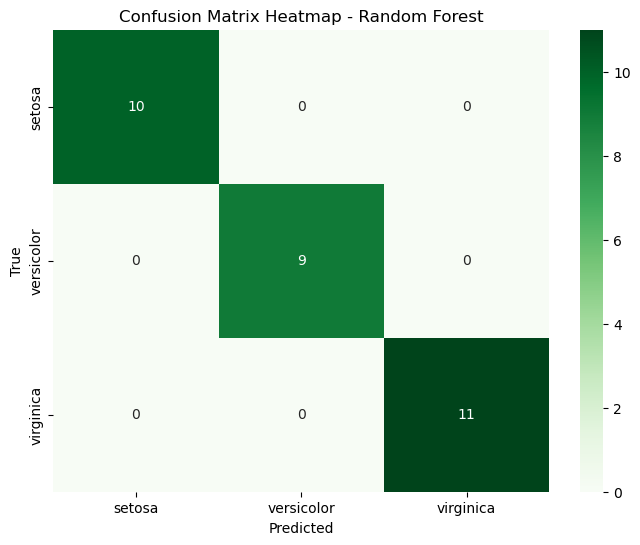

In [19]:
# Step 9 : Confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap - Random Forest")
plt.show()